# **CNN on CIFAR-10 Dataset**

This notebook demonstrates how to preprocess the CIFAR-10 dataset, build a Convolutional Neural Network (CNN) model using Keras, and visualize the model's training and validation behavior, including error loss, training and validation loss, and accuracy.

---




## **1. Importing Libraries**

We'll start by importing the necessary libraries, including TensorFlow, Keras, and Matplotlib for plotting.

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## **2. Loading and Preprocessing the CIFAR-10 Dataset**

The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 different classes. We'll load the dataset and normalize the pixel values to be between 0 and 1.


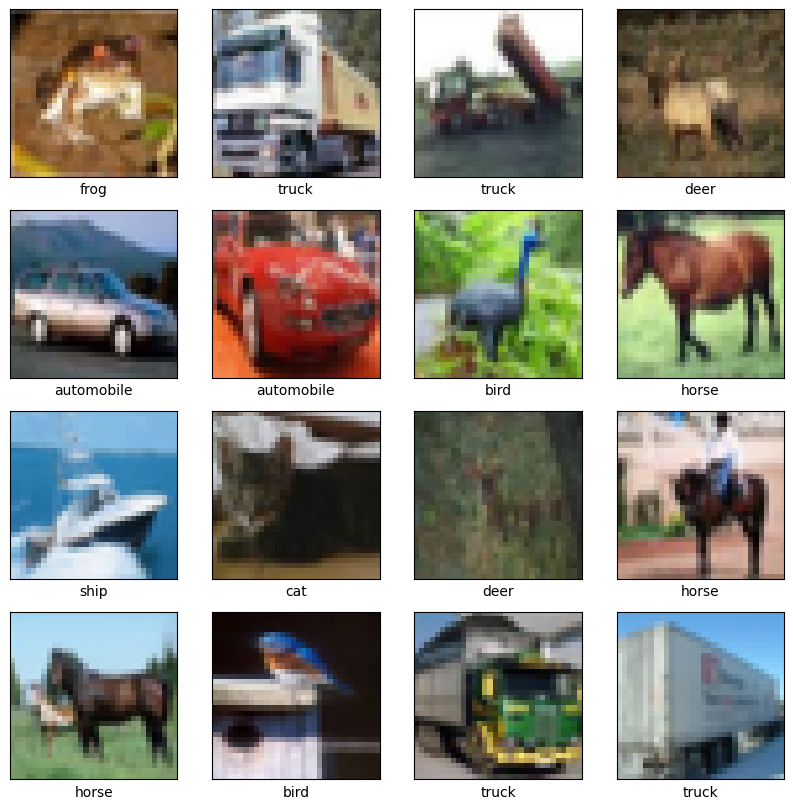

In [4]:
# Load the CIFAR-10 dataset
(train_images, train_lables), (test_images, test_lables)=datasets.cifar10.load_data()
# Normalize the pixel value between 0 and 1

train_images= train_images/255
test_images=test_images/255

# Display a few sample images with labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))

for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_lables[i][0]])
plt.show()


## **3. Building the CNN Model**

We'll build a CNN model with three convolutional layers, followed by pooling layers, and then fully connected layers for classification.


In [6]:
# Build the CNN model
model=models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Display the model artitecture summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

## **4. Compiling and Training the Model**

We'll compile the model using the Adam optimizer and Sparse Categorical Crossentropy loss. Then, we'll train the model for 10 epochs and store the training history.


In [7]:
# complie the model
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# train the model
history=model.fit(train_images, train_lables, epochs=10,
                  validation_data=(test_images, test_lables))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.3471 - loss: 1.7636 - val_accuracy: 0.5555 - val_loss: 1.2499
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 48ms/step - accuracy: 0.5673 - loss: 1.2204 - val_accuracy: 0.5902 - val_loss: 1.1439
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - accuracy: 0.6376 - loss: 1.0345 - val_accuracy: 0.6529 - val_loss: 0.9779
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.6690 - loss: 0.9423 - val_accuracy: 0.6790 - val_loss: 0.9091
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.7005 - loss: 0.8505 - val_accuracy: 0.6715 - val_loss: 0.9627
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 52ms/step - accuracy: 0.7225 - loss: 0.7924 - val_accuracy: 0.6916 - val_loss: 0.8828
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.7327 - loss: 0.7600 - val_accuracy: 0.7061 - val_loss: 0.8639
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 48ms/step - accuracy: 0.7536 

## **5. Evaluating the Model**

After training, we'll evaluate the model's performance on the test set and display the test accuracy.


In [9]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_lables, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 5s - 15ms/step - accuracy: 0.7025 - loss: 0.8957

Test accuracy: 0.7024999856948853


## **6. Plotting the Training and Validation Metrics**

Finally, we'll plot the training and validation loss, as well as the training and validation accuracy, to visualize the model's performance over the epochs.


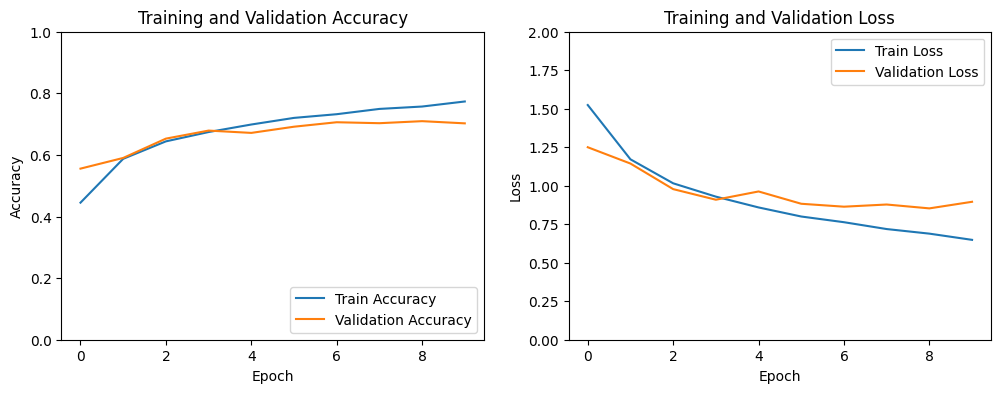

In [10]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


## **7. Visualizing Some Predictions**

We will visualize some predictions made by the trained model on the test set. We'll display the images along with the predicted and true labels.


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


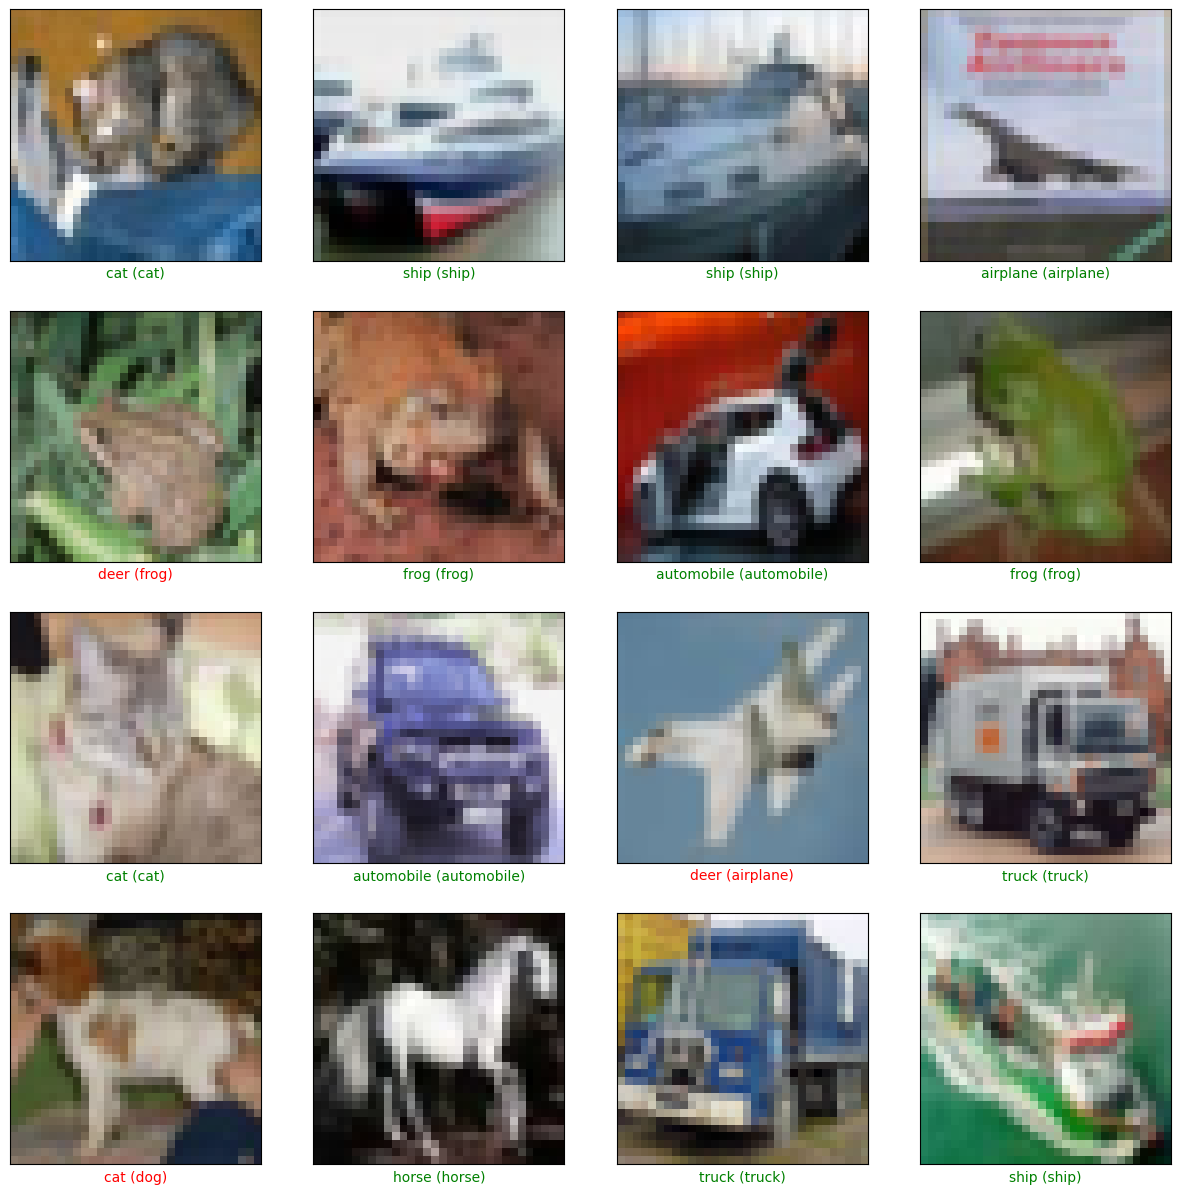

In [12]:
import numpy as np

# Make predictions on the test set
predictions = model.predict(test_images)

# Function to plot images with predictions
def plot_images_with_predictions(images, labels, predictions, class_names):
    plt.figure(figsize=(15,15))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        predicted_label = np.argmax(predictions[i])
        true_label = labels[i][0]
        color = 'green' if predicted_label == true_label else 'red'
        plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)
    plt.show()

# Visualize predictions on the first 16 images in the test set
plot_images_with_predictions(test_images, test_lables, predictions, class_names)


## **8. Conclusion**

In this notebook, we've built and trained a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset. We visualized the model's training and validation accuracy and loss to assess its performance. The model achieved a good test accuracy, but further tuning and optimization might improve the results even further.
